<a href="https://colab.research.google.com/github/PragnyaYS/Intrusion-Classification-Data-Analysis/blob/main/fda_a2_25533252_Pragnya.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
#Importing libraries
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans

## **Importing the dataset**

In [98]:
iot_path = "32130_AT2_25533252.csv"
iotData = pd.read_csv(iot_path)

In [99]:
iotData.head()

,Unnamed: 0,flow_duration,Header_Length,Protocol Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,...,Std,Tot size,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight,label
0,11157,3610.954301,15554.4,7.1,80.1,12.364397,12.364397,0.0,0,0,...,145.236798,141.0,1.666019e+08,13.5,17.153214,205.729363,21205.964430,1.0,244.6,DictionaryBruteForce
1,13091,1.234680,153256.0,6.0,64.0,72.488420,72.488420,0.0,0,0,...,33.920937,54.0,1.666014e+08,13.5,11.668248,48.068186,1161.986877,1.0,244.6,DictionaryBruteForce
2,15624,76.830629,68149.6,6.0,116.6,44.658732,44.658732,0.0,0,0,...,577.442442,388.8,7.625604e-03,5.5,24.683863,816.626933,541527.591000,0.9,38.5,DictionaryBruteForce
3,9686,199.825722,6140.9,6.4,153.8,0.481066,0.481066,0.0,0,0,...,35.748074,101.0,3.004680e-02,5.5,13.627254,50.555412,1454.073203,0.9,38.5,DictionaryBruteForce
4,16163,31.944954,23891.6,6.0,146.2,3.323440,3.323440,0.0,0,0,...,23.418923,93.4,1.644561e-02,5.5,13.361505,33.119359,640.521231,0.9,38.5,DictionaryBruteForce


## **1A Calculating the Summary Statistics**

In [ ]:
#pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)
# Reset pandas display option back to default
#pd.reset_option('display.max_rows')
#pd.reset_option('display.max_columns')
iotData.describe()

,Unnamed: 0,flow_duration,Header_Length,Protocol Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,rst_flag_number,psh_flag_number,ack_flag_number,ece_flag_number,cwr_flag_number,ack_count,syn_count,fin_count,urg_count,rst_count,HTTP,HTTPS,DNS,Telnet,SMTP,SSH,IRC,TCP,UDP,DHCP,ARP,ICMP,IPv,LLC,Tot sum,Min,Max,AVG,Std,Tot size,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight
count,3120.000000,3120.000000,3.120000e+03,3120.000000,3120.000000,3.120000e+03,3.120000e+03,3120.0,3120.000000,3120.00000,3120.000000,3120.000000,3120.000000,3120.0,3120.0,3120.000000,3120.000000,3120.000000,3120.000000,3120.000000,3120.000000,3120.000000,3120.000000,3120.0,3120.0,3120.000000,3120.0,3120.000000,3120.000000,3120.0,3120.0,3120.0,3120.0,3120.0,3120.000000,3120.000000,3120.000000,3120.000000,3120.000000,3120.000000,3.120000e+03,3120.000000,3120.000000,3120.000000,3.120000e+03,3120.000000,3120.000000
mean,9660.562821,68.830399,2.290375e+04,40.439443,68.885773,1.146416e+04,1.146416e+04,0.0,0.000641,0.01250,0.009295,0.003846,0.096795,0.0,0.0,0.025660,0.141460,0.016410,11.421141,39.348408,0.005449,0.049038,0.001923,0.0,0.0,0.002885,0.0,0.119231,0.010897,0.0,0.0,0.0,1.0,1.0,5550.549867,461.241363,621.755197,532.621830,54.406223,531.686887,8.312966e+07,9.478514,31.845517,76.827719,3.707720e+04,0.225176,141.002123
std,5648.455744,1006.994890,1.653903e+05,13.550796,18.196187,1.092999e+05,1.092999e+05,0.0,0.025314,0.11112,0.095976,0.061908,0.295726,0.0,0.0,0.151774,0.405254,0.112453,55.222797,190.566158,0.073626,0.215983,0.043818,0.0,0.0,0.053640,0.0,0.324112,0.103837,0.0,0.0,0.0,0.0,0.0,1853.808456,178.949086,437.043748,199.278954,163.331939,187.479667,3.028971e+07,1.458544,6.713674,230.862542,2.372358e+05,0.304615,37.446258
min,4.000000,0.000000,0.000000e+00,3.600000,7.800000,0.000000e+00,0.000000e+00,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,1.0,1.0,297.000000,42.000000,54.000000,53.732491,0.000000,54.000000,1.500000e-06,1.000000,10.366429,0.000000,0.000000e+00,0.000000,1.000000
25%,4763.750000,0.000000,0.000000e+00,44.860000,64.000000,3.099205e+00,3.099205e+00,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,1.0,1.0,5867.770000,438.087500,578.000000,558.023009,0.000000,559.785000,8.358161e+07,9.500000,33.348939,0.000000,0.000000e+00,0.000000,141.550000
50%,9652.500000,0.000000,7.900000e-01,46.530000,64.000000,1.349833e+01,1.349833e+01,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,1.0,1.0,6018.585000,526.200000,578.000000,574.650312,12.872179,572.840000,8.364675e+07,9.500000,33.897287,18.243216,1.462267e+03,0.110000,141.550000
75%,14564.000000,0.033177,1.715750e+01,47.000000,65.910000,4.474277e+01,4.474277e+01,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.010000,0.000000,0.010000,0.050000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,1.0,1.0,6069.000000,578.000000,578.000000,578.000000,38.538235,578.000000,8.365091e+07,9.500000,34.000000,54.516564,5.733935e+03,0.290000,141.550000
max,19494.000000,38548.575930,5.524156e+06,47.000000,255.000000,2.097152e+06,2.097152e+06,0.0,1.000000,1.00000,1.000000,1.000000,1.000000,0.0,0.0,2.900000,4.480000,2.000000,899.100000,4161.360000,1.000000,1.000000,1.000000,0.0,0.0,1.000000,0.0,1.000000,1.000000,0.0,0.0,0.0,1.0,1.0,27071.000000,2093.200000,8174.800000,4099.559246,2523.685954,2962.700000,1.666019e+08,13.500000,89.884119,3569.030903,7.110441e+06,1.000000,244.600000


In [ ]:
stats_dict = {}

# Iterate through each column in the dataframe
for column in iotData.columns:
    # Check if the column is numeric
    if pd.api.types.is_numeric_dtype(iotData[column]):
        # Calculate Mean
        mean = iotData[column].mean()

        # Calculate Median
        median = iotData[column].median()

        # Calculate Mode
        mode = iotData[column].mode().values[0] if not iotData[column].mode().empty else np.nan

        # Calculate Variance
        variance = iotData[column].var()

        # Calculate Range
        data_range = iotData[column].max() - iotData[column].min()

        # Store the statistics in the dictionary
        stats_dict[column] = {
            'Mean': mean,
            'Median': median,
            'Mode': mode,
            'Variance': variance,
            'Range': data_range
        }

# Convert the dictionary to a DataFrame for better readability
stats_iotData = pd.DataFrame(stats_dict).T

# Display the statistics DataFrame
print(stats_iotData)

                         Mean        Median         Mode      Variance  \
Unnamed: 0       9.660563e+03  9.652500e+03     4.000000  3.190505e+07   
flow_duration    6.883040e+01  0.000000e+00     0.000000  1.014039e+06   
Header_Length    2.290375e+04  7.900000e-01     0.000000  2.735394e+10   
Protocol Type    4.043944e+01  4.653000e+01    47.000000  1.836241e+02   
Duration         6.888577e+01  6.400000e+01    64.000000  3.311012e+02   
Rate             1.146416e+04  1.349833e+01     0.000000  1.194646e+10   
Srate            1.146416e+04  1.349833e+01     0.000000  1.194646e+10   
Drate            0.000000e+00  0.000000e+00     0.000000  0.000000e+00   
fin_flag_number  6.410256e-04  0.000000e+00     0.000000  6.408201e-04   
syn_flag_number  1.250000e-02  0.000000e+00     0.000000  1.234771e-02   
rst_flag_number  9.294872e-03  0.000000e+00     0.000000  9.211430e-03   
psh_flag_number  3.846154e-03  0.000000e+00     0.000000  3.832589e-03   
ack_flag_number  9.679487e-02  0.00000

## **1A Visualizing the Index column - Unnamed: 0**

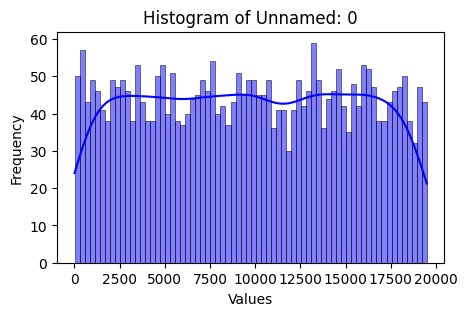

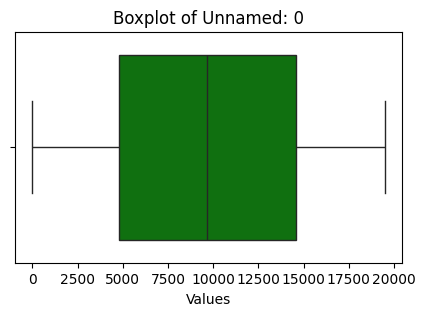

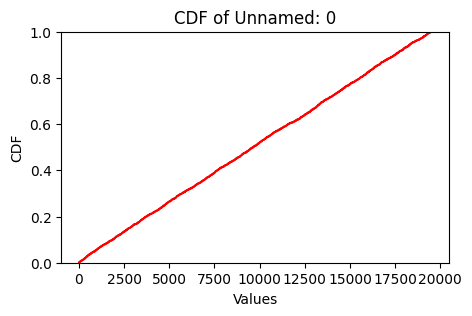

In [100]:
# Visualization 1: Histogram of 'Unnamed: 0'
plt.figure(figsize=(5, 3))
sns.histplot(iotData['Unnamed: 0'], bins=70, kde=True, color='blue')
plt.title('Histogram of Unnamed: 0')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.show()

# Visualization 2: Boxplot to visualize spread and outliers
plt.figure(figsize=(5, 3))
sns.boxplot(x=iotData['Unnamed: 0'], color='green')
plt.title('Boxplot of Unnamed: 0')
plt.xlabel('Values')
plt.show()

# Visualization 3: Cumulative Distribution Function (CDF)
plt.figure(figsize=(5, 3))
sns.ecdfplot(iotData['Unnamed: 0'], color='red')
plt.title('CDF of Unnamed: 0')
plt.xlabel('Values')
plt.ylabel('CDF')
plt.show()

## **1A Visualizing the attributes with all values 0 or all values 1**

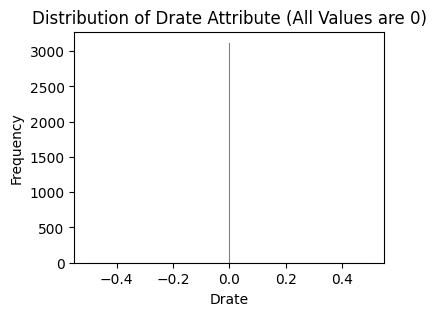

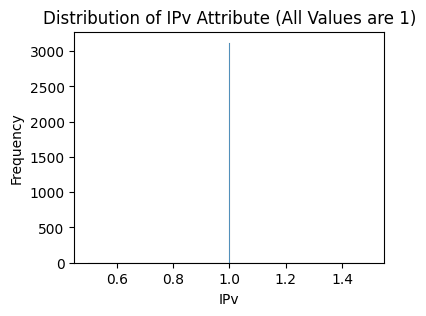

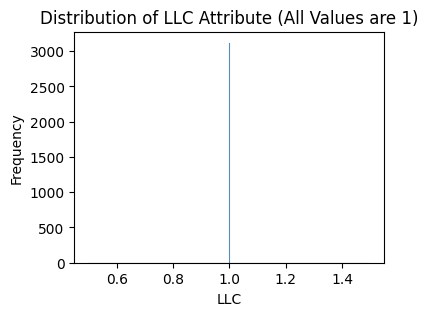

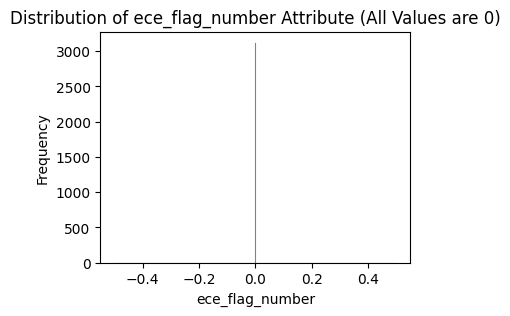

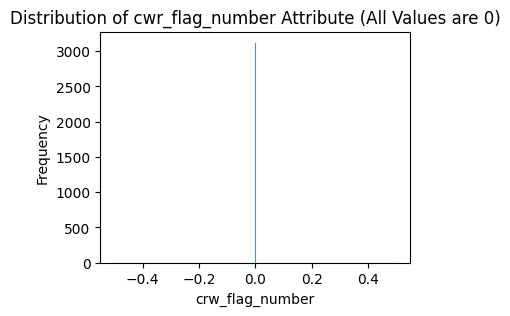

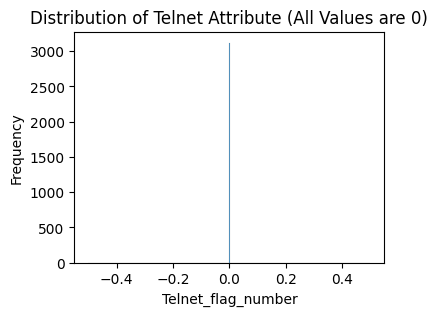

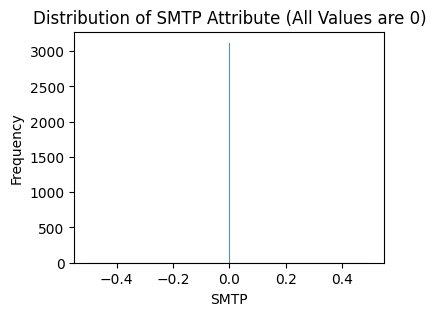

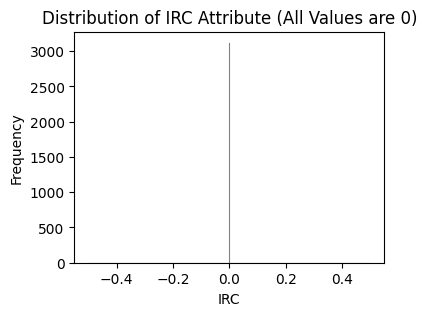

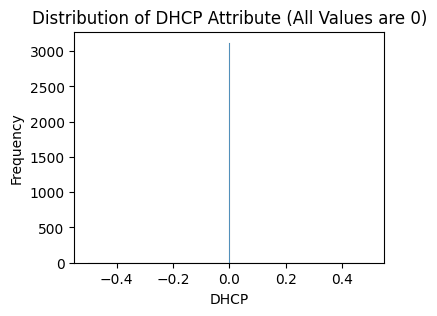

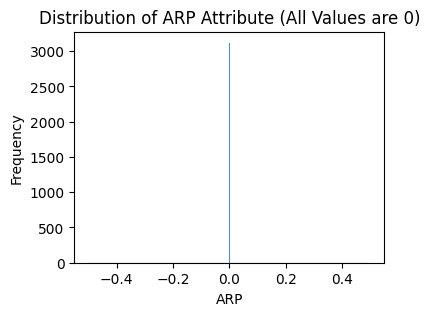

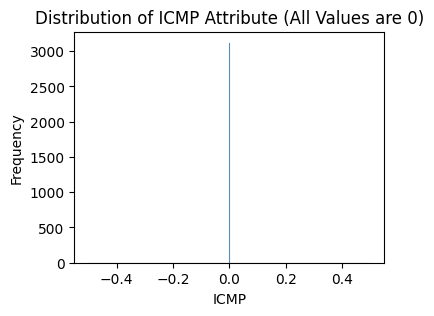

In [ ]:
# Visualizing the distribution (this will show a single bar at 0 OR single bar at 1)

plt.figure(figsize=(4, 3))
sns.histplot(iotData['Drate'], bins=500, kde=False)
# Set bins to higher value to restrict the range to exactly 0
# seaborn (and even matplotlib) automatically adjusts the axis to make the plot look "better"
#even if the data contains only one unique value.
plt.title('Distribution of Drate Attribute (All Values are 0)')
plt.xlabel('Drate')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(4, 3))
sns.histplot(iotData['IPv'], bins=500, kde=False)
# Set bins to higher value to restrict the range to exactly 1
plt.title('Distribution of IPv Attribute (All Values are 1)')
plt.xlabel('IPv')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(4, 3))
sns.histplot(iotData['LLC'], bins=500, kde=False)
# Set bins to higher value to restrict the range to exactly 1
plt.title('Distribution of LLC Attribute (All Values are 1)')
plt.xlabel('LLC')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(4, 3))
sns.histplot(iotData['ece_flag_number'], bins=500, kde=False)
# Set bins to higher value to restrict the range to exactly 0
plt.title('Distribution of ece_flag_number Attribute (All Values are 0)')
plt.xlabel('ece_flag_number')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(4, 3))
sns.histplot(iotData['cwr_flag_number'], bins=500, kde=False)
# Set bins to higher value to restrict the range to exactly 0
plt.title('Distribution of cwr_flag_number Attribute (All Values are 0)')
plt.xlabel('crw_flag_number')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(4, 3))
sns.histplot(iotData['Telnet'], bins=500, kde=False)
# Set bins to higher value to restrict the range to exactly 0
plt.title('Distribution of Telnet Attribute (All Values are 0)')
plt.xlabel('Telnet_flag_number')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(4, 3))
sns.histplot(iotData['SMTP'], bins=500, kde=False)
# Set bins to higher value to restrict the range to exactly 0
plt.title('Distribution of SMTP Attribute (All Values are 0)')
plt.xlabel('SMTP')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(4, 3))
sns.histplot(iotData['IRC'], bins=500, kde=False)
# Set bins to higher value to restrict the range to exactly 0
plt.title('Distribution of IRC Attribute (All Values are 0)')
plt.xlabel('IRC')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(4, 3))
sns.histplot(iotData['DHCP'], bins=500, kde=False)
# Set bins to higher value to restrict the range to exactly 0
plt.title('Distribution of DHCP Attribute (All Values are 0)')
plt.xlabel('DHCP')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(4, 3))
sns.histplot(iotData['ARP'], bins=500, kde=False)
# Set bins to higher value to restrict the range to exactly 0
plt.title('Distribution of ARP Attribute (All Values are 0)')
plt.xlabel('ARP')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(4, 3))
sns.histplot(iotData['ICMP'], bins=500, kde=False)
# Set bins to higher value to restrict the range to exactly 0
plt.title('Distribution of ICMP Attribute (All Values are 0)')
plt.xlabel('ICMP')
plt.ylabel('Frequency')
plt.show()

## **1A Visualizing nominal attributes with values 0 or 1**

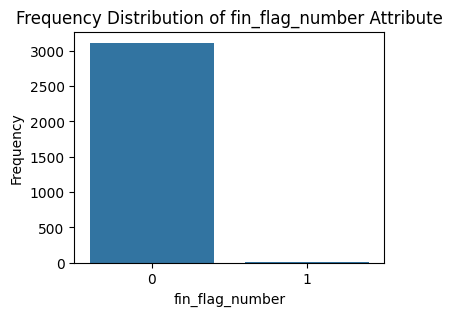

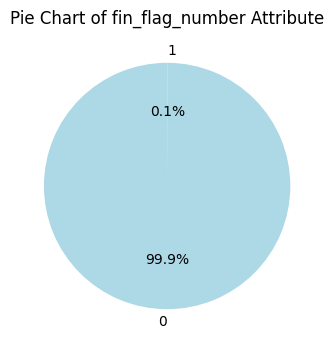

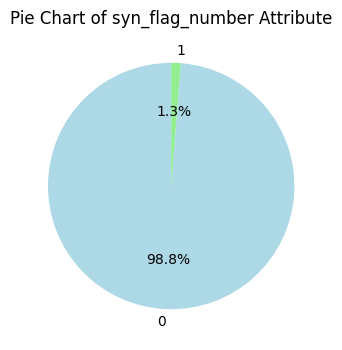

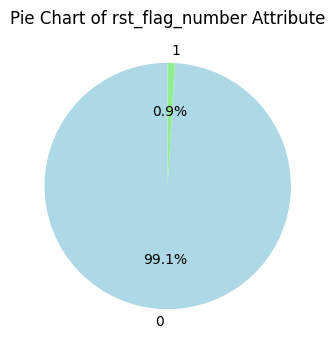

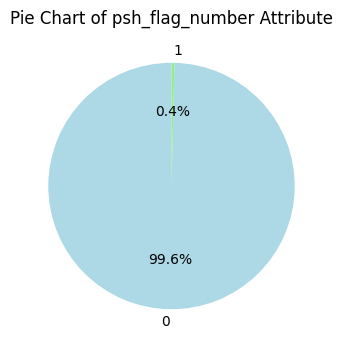

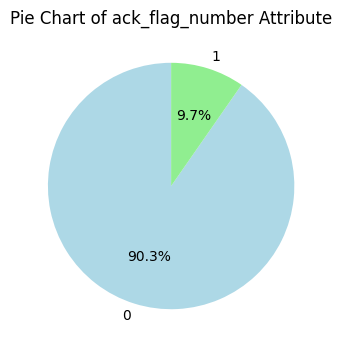

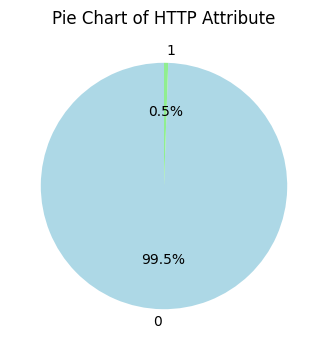

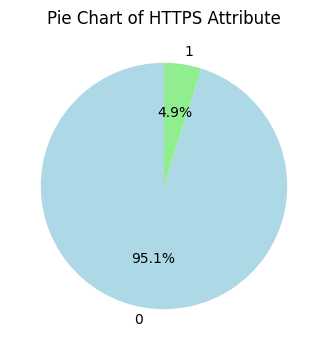

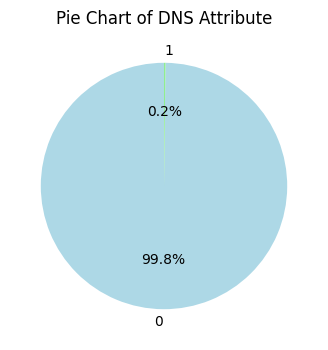

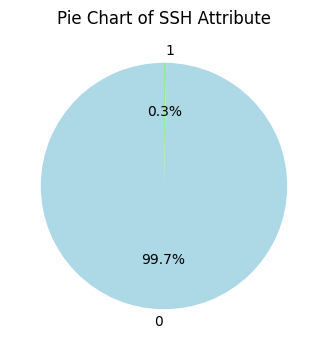

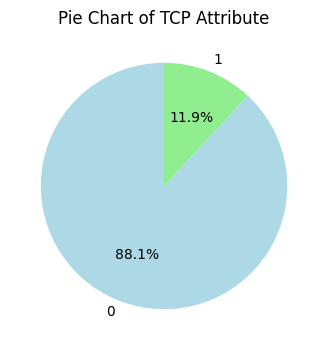

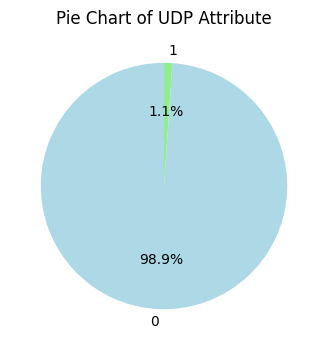

In [ ]:
# Visualize the frequency distribution using a bar plot
plt.figure(figsize=(4, 3))
sns.countplot(x=iotData['fin_flag_number'], legend=False)
plt.title('Frequency Distribution of fin_flag_number Attribute')
plt.xlabel('fin_flag_number')
plt.ylabel('Frequency')
plt.show()

# Visualize with a pie chart
plt.figure(figsize=(4, 4))
plt.pie(iotData['fin_flag_number'].value_counts(), labels=iotData['fin_flag_number'].value_counts().index, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightgreen'])
plt.title('Pie Chart of fin_flag_number Attribute')
plt.show()

plt.figure(figsize=(4, 4))
plt.pie(iotData['syn_flag_number'].value_counts(), labels=iotData['syn_flag_number'].value_counts().index, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightgreen'])
plt.title('Pie Chart of syn_flag_number Attribute')
plt.show()

plt.figure(figsize=(4, 4))
plt.pie(iotData['rst_flag_number'].value_counts(), labels=iotData['rst_flag_number'].value_counts().index, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightgreen'])
plt.title('Pie Chart of rst_flag_number Attribute')
plt.show()

plt.figure(figsize=(4, 4))
plt.pie(iotData['psh_flag_number'].value_counts(), labels=iotData['psh_flag_number'].value_counts().index, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightgreen'])
plt.title('Pie Chart of psh_flag_number Attribute')
plt.show()

plt.figure(figsize=(4, 4))
plt.pie(iotData['ack_flag_number'].value_counts(), labels=iotData['ack_flag_number'].value_counts().index, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightgreen'])
plt.title('Pie Chart of ack_flag_number Attribute')
plt.show()

plt.figure(figsize=(4, 4))
plt.pie(iotData['HTTP'].value_counts(), labels=iotData['HTTP'].value_counts().index, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightgreen'])
plt.title('Pie Chart of HTTP Attribute')
plt.show()

plt.figure(figsize=(4, 4))
plt.pie(iotData['HTTPS'].value_counts(), labels=iotData['HTTPS'].value_counts().index, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightgreen'])
plt.title('Pie Chart of HTTPS Attribute')
plt.show()

plt.figure(figsize=(4, 4))
plt.pie(iotData['DNS'].value_counts(), labels=iotData['DNS'].value_counts().index, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightgreen'])
plt.title('Pie Chart of DNS Attribute')
plt.show()

plt.figure(figsize=(4, 4))
plt.pie(iotData['SSH'].value_counts(), labels=iotData['SSH'].value_counts().index, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightgreen'])
plt.title('Pie Chart of SSH Attribute')
plt.show()

plt.figure(figsize=(4, 4))
plt.pie(iotData['TCP'].value_counts(), labels=iotData['TCP'].value_counts().index, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightgreen'])
plt.title('Pie Chart of TCP Attribute')
plt.show()

plt.figure(figsize=(4, 4))
plt.pie(iotData['UDP'].value_counts(), labels=iotData['UDP'].value_counts().index, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightgreen'])
plt.title('Pie Chart of UDP Attribute')
plt.show()

## **1A Visualizing the Ratio attributes**

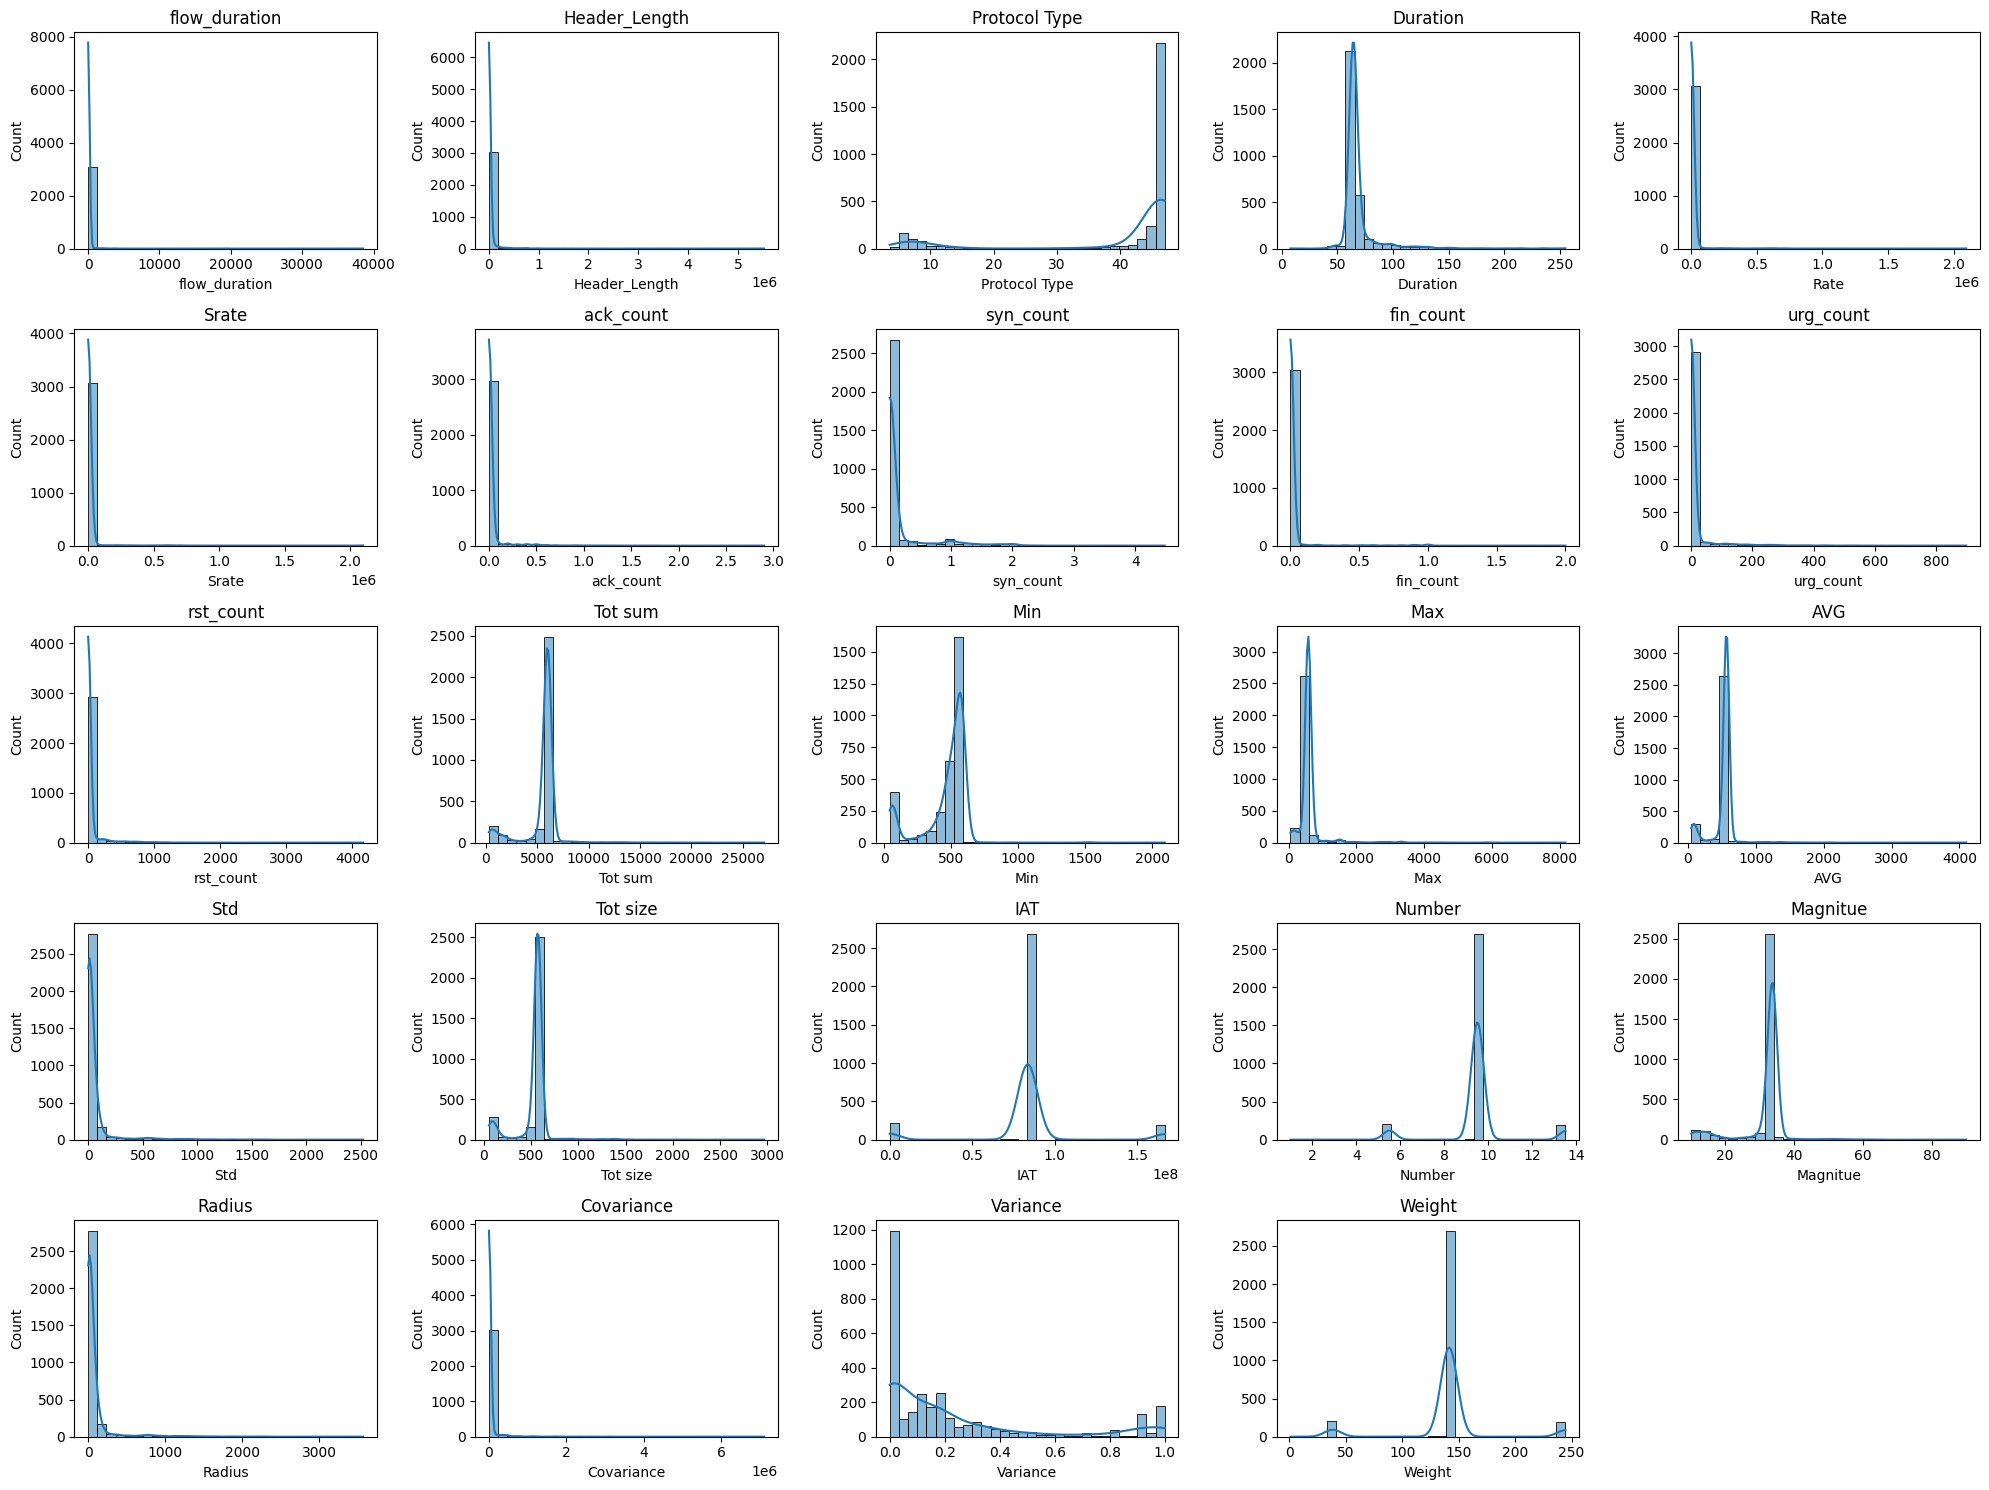

In [ ]:
# List of ratio attributes
ratio_attributes = [
    'flow_duration', 'Header_Length', 'Protocol Type', 'Duration', 'Rate',
    'Srate', 'ack_count', 'syn_count', 'fin_count', 'urg_count', 'rst_count',
    'Tot sum', 'Min', 'Max', 'AVG', 'Std', 'Tot size', 'IAT', 'Number',
    'Magnitue', 'Radius', 'Covariance', 'Variance', 'Weight'
]

# Visualizing the distributions of each attribute using histograms
plt.figure(figsize=(20, 15))
for i, attribute in enumerate(ratio_attributes, 1):
    plt.subplot(5, 5, i)
    sns.histplot(iotData[attribute], bins=30, kde=True)
    plt.title(attribute)
plt.tight_layout()
plt.show()

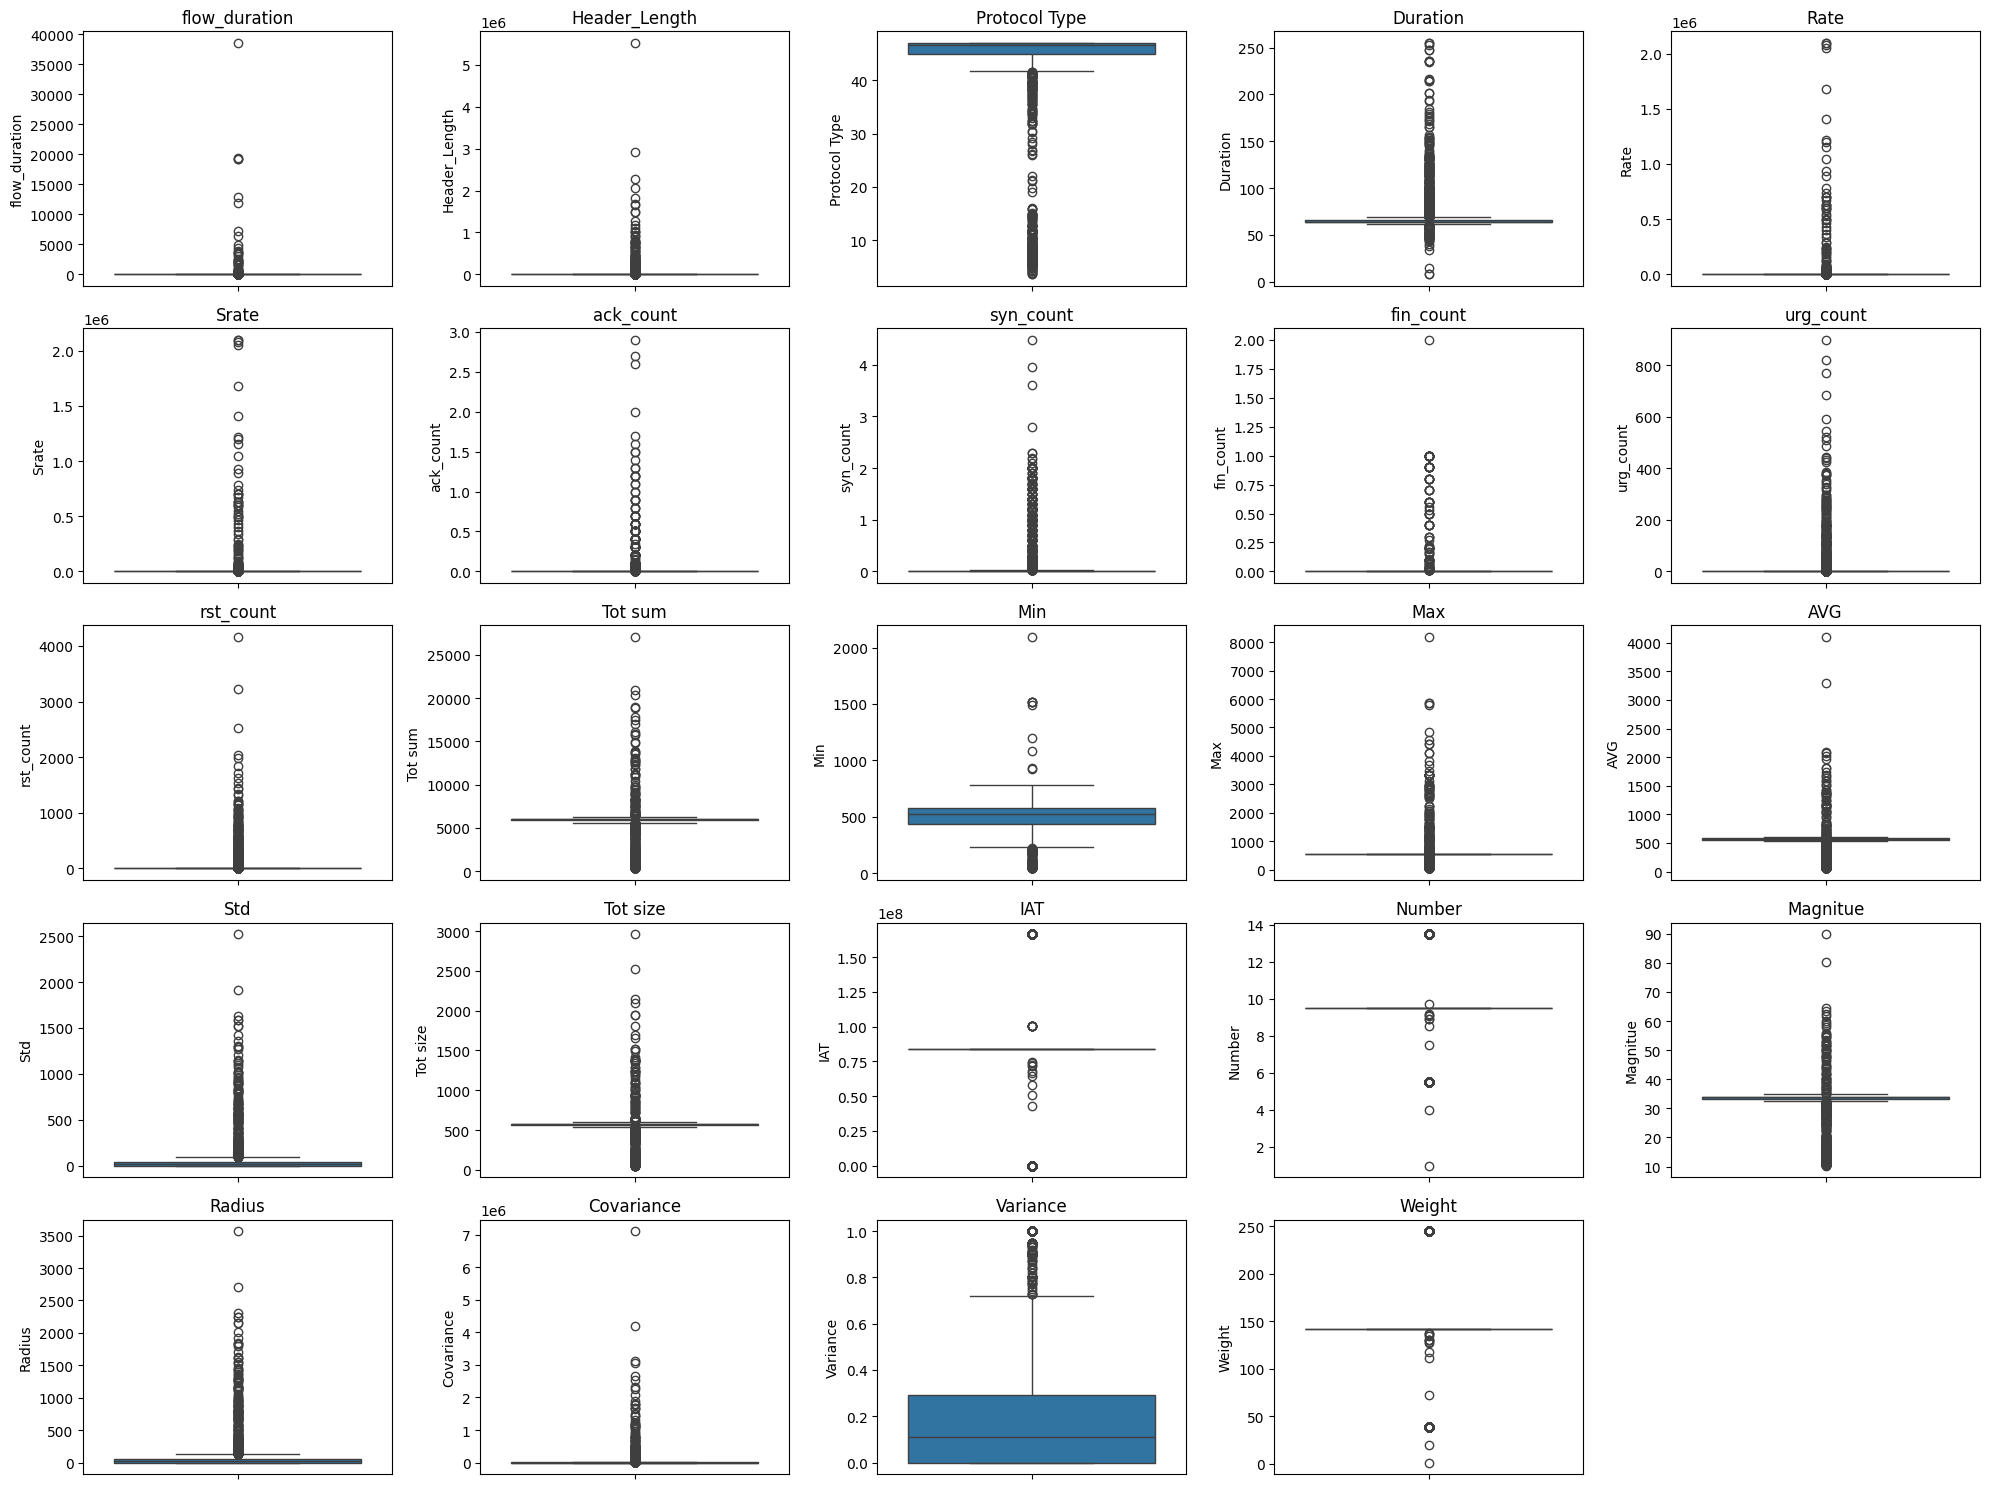

In [ ]:
# Plotting boxplots to identify outliers
plt.figure(figsize=(20, 15))
for i, attribute in enumerate(ratio_attributes, 1):
    plt.subplot(5, 5, i)
    sns.boxplot(data=iotData[attribute], orient='v')
    plt.title(attribute)
plt.tight_layout()
plt.show()

In [ ]:
# Pairplot to visualize relationships between these attributes
sns.pairplot(iotData[ratio_attributes])
plt.show()

## **1A Multiple attributes relationships**

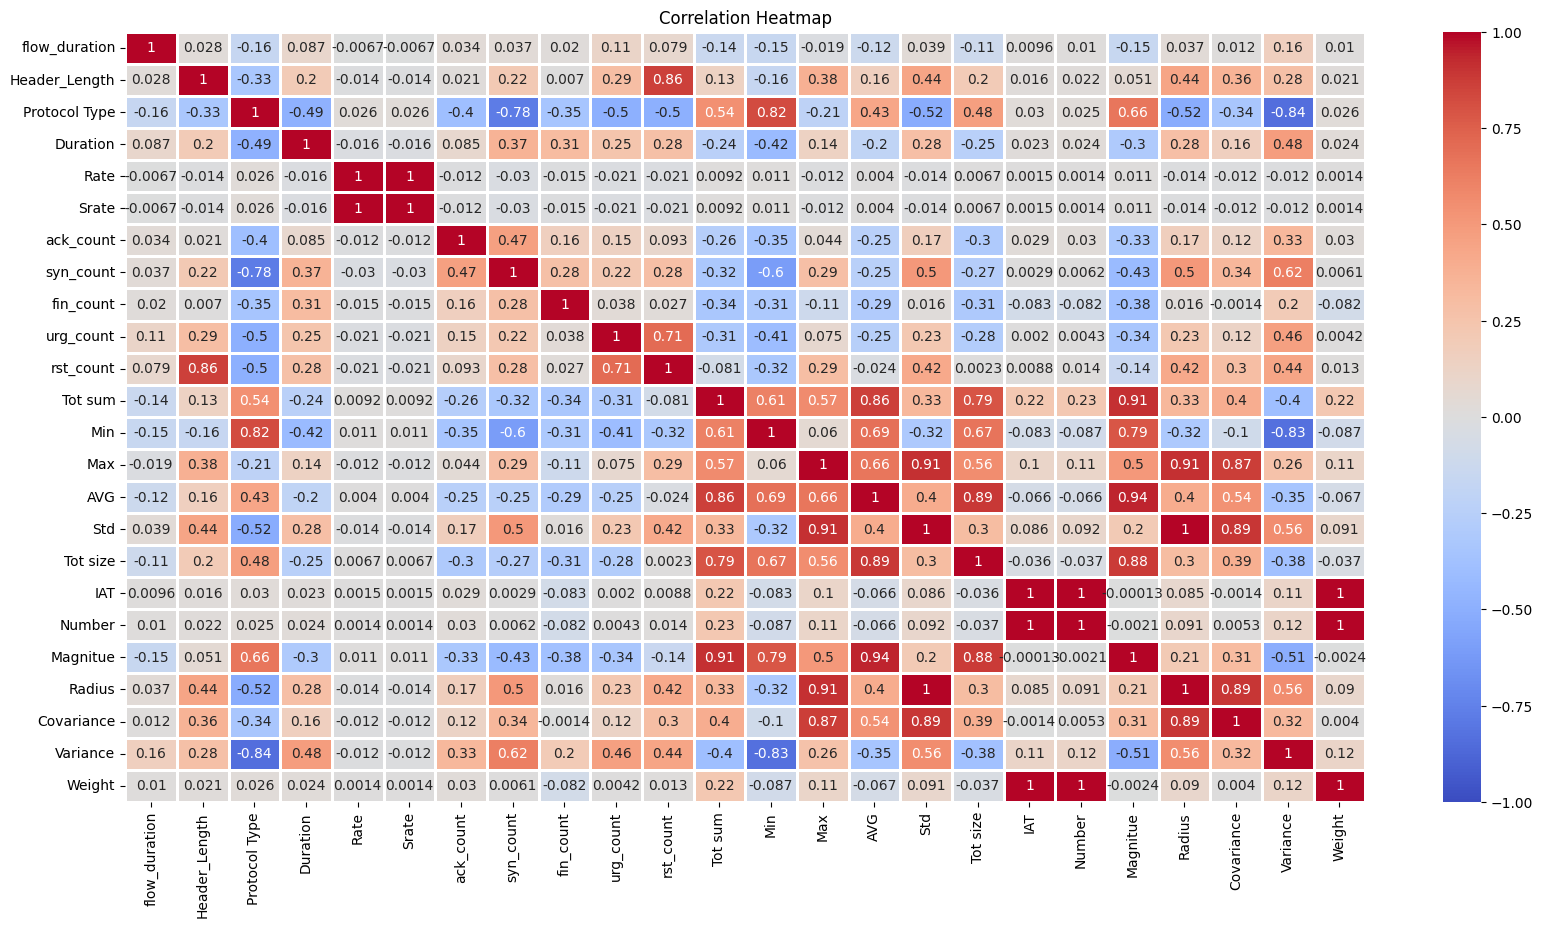

In [ ]:
# List of ratio attributes
ratio_attributes = [
    'flow_duration', 'Header_Length', 'Protocol Type', 'Duration', 'Rate',
    'Srate', 'ack_count', 'syn_count', 'fin_count', 'urg_count', 'rst_count',
    'Tot sum', 'Min', 'Max', 'AVG', 'Std', 'Tot size', 'IAT', 'Number',
    'Magnitue', 'Radius', 'Covariance', 'Variance', 'Weight'
]

# Calculate correlation matrix to identify the strong relationships among attributes
corr_matrix = iotData[ratio_attributes].corr()

# Plot heatmap
plt.figure(figsize=(20, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.8)
plt.title('Correlation Heatmap')
plt.show()


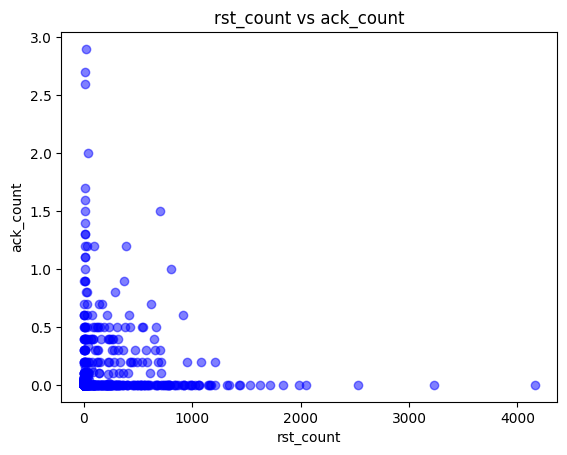

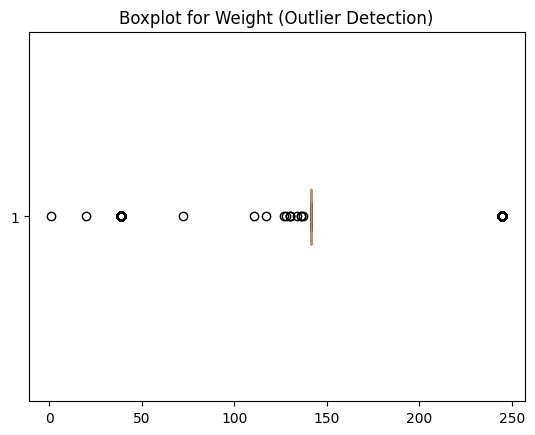

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


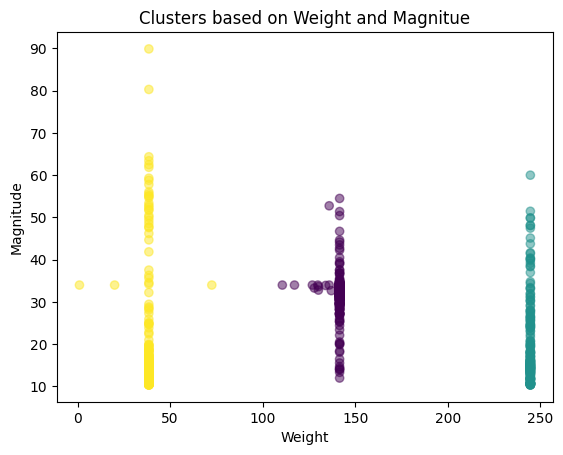

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


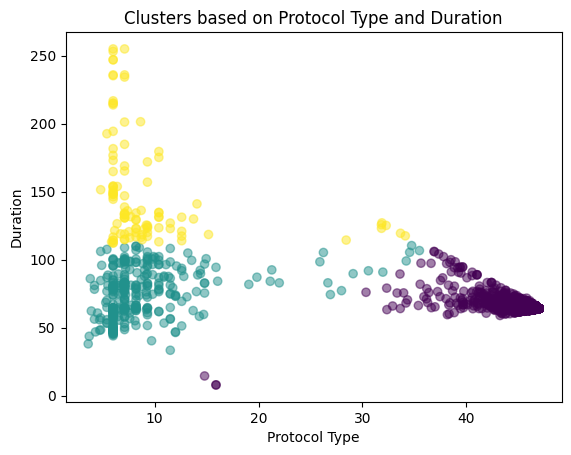

In [86]:
# Scatter Plot for Strongly Correlated Attributes
# Example: rst_count vs ack_count
plt.scatter(iotData['rst_count'], iotData['ack_count'], alpha=0.5, c='blue')
plt.title('rst_count vs ack_count')
plt.xlabel('rst_count')
plt.ylabel('ack_count')
plt.show()

# 3. Box Plot to Detect Outliers
# Outlier detection for 'Weight' attribute
plt.boxplot(iotData['Weight'].dropna(), vert=False)
plt.title('Boxplot for Weight (Outlier Detection)')
plt.show()

# 4. Clustering - Using KMeans to Identify Clusters
# Using two attributes for clustering: 'Weight' and 'Magnitude'
X = iotData[['Weight', 'Magnitue']].dropna()

# Perform KMeans clustering
kmeans = KMeans(n_clusters=3)
iotData['Cluster'] = kmeans.fit_predict(X)

# Plot the clusters
plt.scatter(iotData['Weight'], iotData['Magnitue'], c=iotData['Cluster'], cmap='viridis', alpha=0.5)
plt.title('Clusters based on Weight and Magnitue')
plt.xlabel('Weight')
plt.ylabel('Magnitude')
plt.show()

# 4. Clustering - Using KMeans to Identify Clusters
# Using two attributes for clustering: 'Protocol Type' and 'Duration'
X = iotData[['Protocol Type', 'Duration']].dropna()

# Perform KMeans clustering
kmeans = KMeans(n_clusters=3)
iotData['Cluster'] = kmeans.fit_predict(X)

plt.scatter(iotData['Protocol Type'], iotData['Duration'], c=iotData['Cluster'], cmap='viridis', alpha=0.5)
plt.title('Clusters based on Protocol Type and Duration')
plt.xlabel('Protocol Type')
plt.ylabel('Duration')
plt.show()


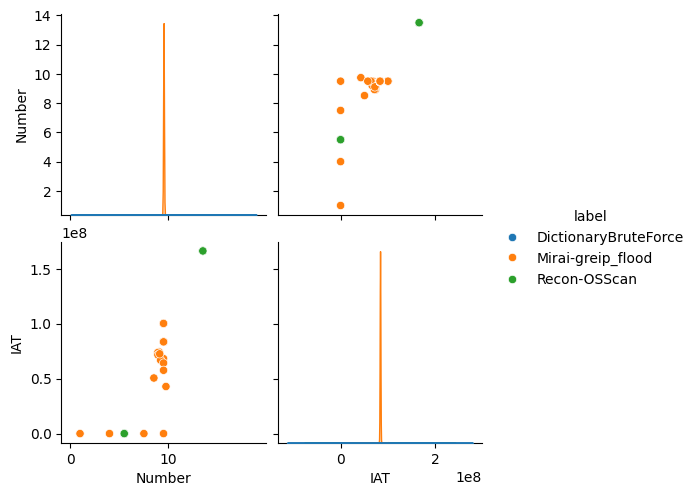

In [ ]:
# Pairplot of strongly correlated attributes in relation to the labels
sns.pairplot(iotData, hue='label', vars=[ 'Number', 'IAT'])
plt.show()


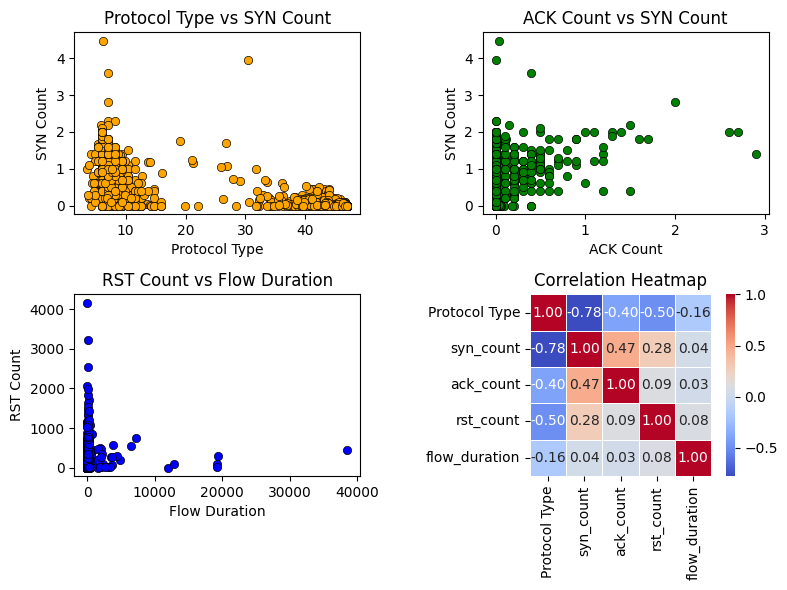

In [81]:
# Create a scatter plot
plt.figure(figsize=(8, 6))

# Subplot 1: Protocol Type vs SYN Count
plt.subplot(2, 2, 1)
sns.scatterplot(x='Protocol Type', y='syn_count', data=iotData, color='orange', edgecolor='k')
plt.title('Protocol Type vs SYN Count')
plt.xlabel('Protocol Type')
plt.ylabel('SYN Count')

# Subplot 2: ACK Count vs SYN Count
plt.subplot(2, 2, 2)
sns.scatterplot(x='ack_count', y='syn_count', data=iotData, color='green', edgecolor='k')
plt.title('ACK Count vs SYN Count')
plt.xlabel('ACK Count')
plt.ylabel('SYN Count')

# Subplot 3: RST Count vs Flow Duration
plt.subplot(2, 2, 3)
sns.scatterplot(x='flow_duration', y='rst_count', data=iotData, color='blue', edgecolor='k')
plt.title('RST Count vs Flow Duration')
plt.xlabel('Flow Duration')
plt.ylabel('RST Count')

# Subplot 4: Heatmap of Correlation (for a closer look at the correlations between these attributes)
plt.subplot(2, 2, 4)
correlation_data = iotData[['Protocol Type', 'syn_count', 'ack_count', 'rst_count', 'flow_duration']].corr()
sns.heatmap(correlation_data, annot=True, cmap='coolwarm', cbar=True, square=True, fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')

# Display the plots
plt.tight_layout()
plt.show()

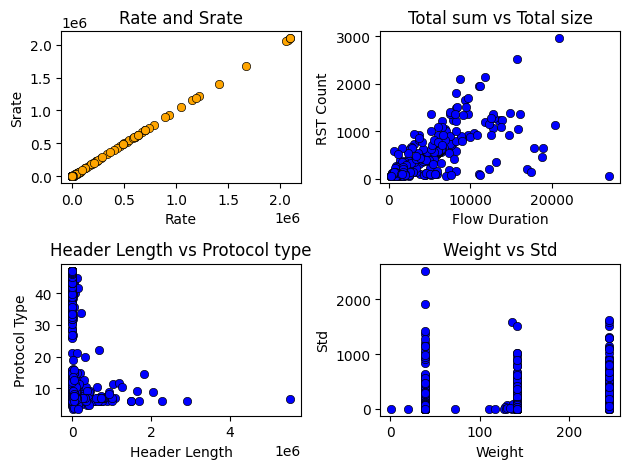

In [84]:
# Subplot 5: Rate vs Srate
plt.subplot(2, 2, 1)
sns.scatterplot(x='Rate', y='Srate', data=iotData, color='orange', edgecolor='k')
plt.title('Rate and Srate')
plt.xlabel('Rate')
plt.ylabel('Srate')

# Subplot 6: Total Size vs Total Sum
plt.subplot(2, 2, 2)
sns.scatterplot(x='Tot sum', y='Tot size', data=iotData, color='blue', edgecolor='k')
plt.title('Total sum vs Total size')
plt.xlabel('Flow Duration')
plt.ylabel('RST Count')

# Subplot 7: Header Length vs Protocol type
plt.subplot(2, 2, 3)
sns.scatterplot(x='Header_Length', y='Protocol Type', data=iotData, color='blue', edgecolor='k')
plt.title('Header Length vs Protocol type')
plt.xlabel('Header Length')
plt.ylabel('Protocol Type')

# Subplot 8: Weight vs Standard deviation
plt.subplot(2, 2, 4)
sns.scatterplot(x='Weight', y='Std', data=iotData, color='blue', edgecolor='k')
plt.title('Weight vs Std')
plt.xlabel('Weight')
plt.ylabel('Std')

# Display the plots
plt.tight_layout()
plt.show()

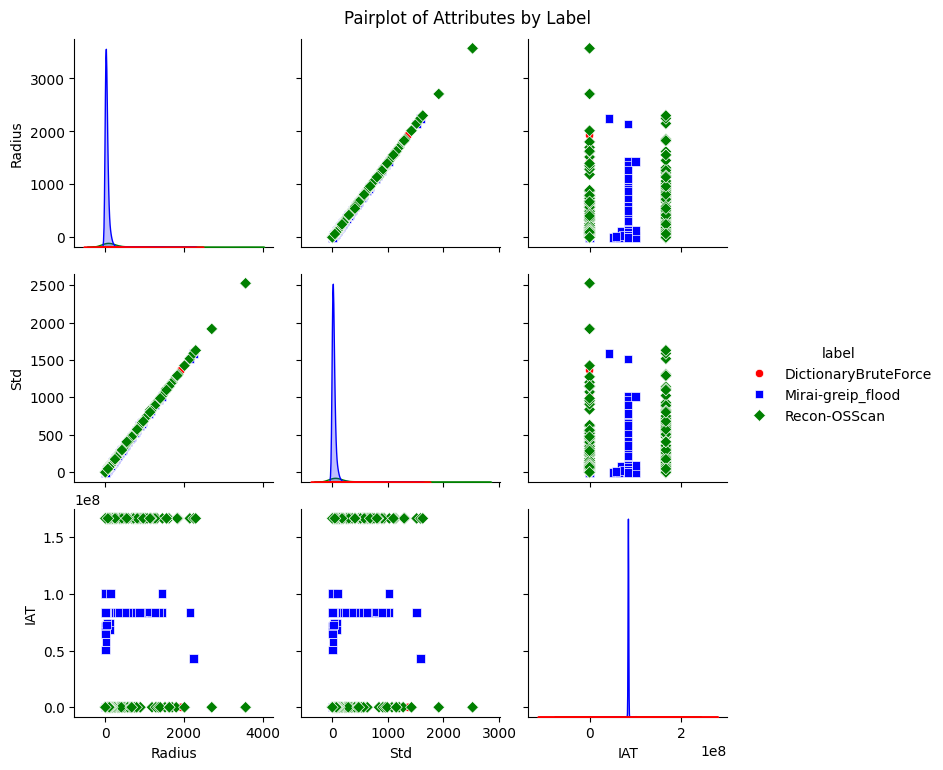

<ipython-input-96-1129d94e46ec>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='label', y='Std', data=filtered_iotData, palette=label_palette, legend=False)


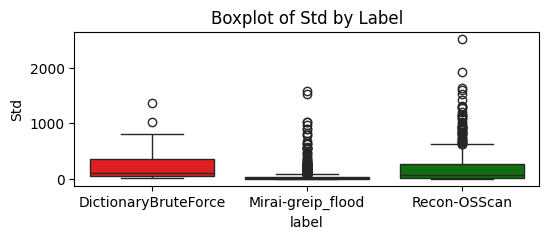

<ipython-input-96-1129d94e46ec>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='label', y='Protocol Type', data=filtered_iotData, palette=label_palette,legend=False)


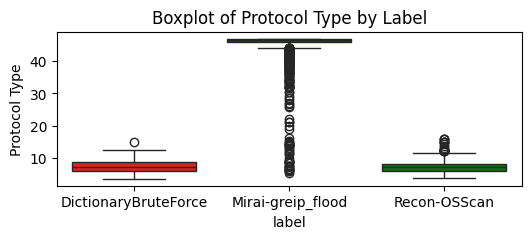

<ipython-input-96-1129d94e46ec>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='label', y='Duration', data=filtered_iotData, palette=label_palette, legend=False)


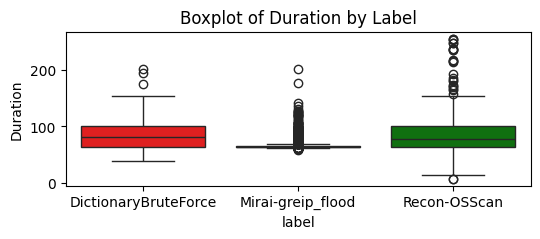

<ipython-input-96-1129d94e46ec>:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='label', y='Rate', data=filtered_iotData, palette=label_palette, legend=False)


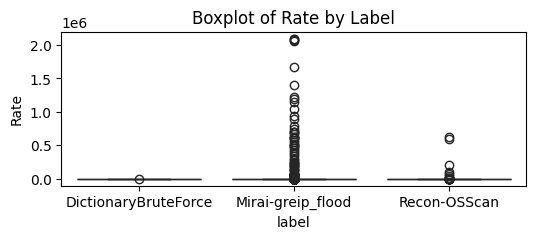

In [96]:
# Filter the dataset based on the labels
labels_to_visualize = ['Mirai-greip_flood', 'Recon-OSScan', 'DictionaryBruteForce']
filtered_iotData = iotData[iotData['label'].isin(labels_to_visualize)]

# Set up the color palette for the labels
label_palette = {'Mirai-greip_flood': 'blue', 'Recon-OSScan': 'green', 'DictionaryBruteForce': 'red'}

# Pairplot to visualize relationships between multiple attributes with hue as labels
# Select relevant columns to visualize, e.g. 'Radius', 'Std', 'IAT'
sns.pairplot(filtered_iotData, hue='label', palette=label_palette,
             vars=['Radius', 'Std', 'IAT'], markers=['o', 's', 'D'])
plt.suptitle("Pairplot of Attributes by Label", y=1.02)
plt.show()

# Boxplot to compare the distribution of attributes across different labels
plt.figure(figsize=(6, 2))
sns.boxplot(x='label', y='Std', data=filtered_iotData, palette=label_palette, legend=False)
plt.title('Boxplot of Std by Label')
plt.show()

# Boxplot to compare the distribution of attributes across different labels
plt.figure(figsize=(6, 2))
sns.boxplot(x='label', y='Protocol Type', data=filtered_iotData, palette=label_palette,legend=False)
plt.title('Boxplot of Protocol Type by Label')
plt.show()

# Boxplot to compare the distribution of attributes across different labels
plt.figure(figsize=(6, 2))
sns.boxplot(x='label', y='Duration', data=filtered_iotData, palette=label_palette, legend=False)
plt.title('Boxplot of Duration by Label')
plt.show()

# Boxplot to compare the distribution of attributes across different labels
plt.figure(figsize=(6, 2))
sns.boxplot(x='label', y='Rate', data=filtered_iotData, palette=label_palette, legend=False)
plt.title('Boxplot of Rate by Label')
plt.show()

## **1B Binning**

In [28]:
# sturges rule and Square root bins rule
# Extract Protocol Type and Duration columns
protocol_type = iotData['Protocol Type']
duration = iotData['Duration']

# Number of data points
n_protocol = len(protocol_type)
n_duration = len(duration)

# Sturges' formula for number of bins
bins_sturges_protocol = int(1 + np.log2(n_protocol))
bins_sturges_duration = int(1 + np.log2(n_duration))

# Square Root rule for number of bins
bins_sqrt_protocol = int(np.sqrt(n_protocol))
bins_sqrt_duration = int(np.sqrt(n_duration))

# Print the results
print(f"Protocol Type: Sturges' bins = {bins_sturges_protocol}, Square Root bins = {bins_sqrt_protocol}")
print(f"Duration: Sturges' bins = {bins_sturges_duration}, Square Root bins = {bins_sqrt_duration}")


Protocol Type: Sturges' bins = 12, Square Root bins = 55
Duration: Sturges' bins = 12, Square Root bins = 55


In [18]:
# Freedman-Diaconis Rule for Protocol Type and Duration
def freedman_diaconis(iotData, col):
    q25, q75 = np.percentile(iotData[col], [25, 75])
    iqr = q75 - q25
    bin_width = 2 * iqr / np.cbrt(len(iotData[col]))
    n_bins = int(np.ceil((iotData[col].max() - iotData[col].min()) / bin_width))
    return n_bins

# Example for 'Protocol Type' and 'Duration'
n_bins_protocol_fd = freedman_diaconis(iotData, 'Protocol Type')
n_bins_duration_fd = freedman_diaconis(iotData, 'Duration')

print(f"Number of bins for Protocol Type (Freedman-Diaconis Rule): {n_bins_protocol_fd}")
print(f"Number of bins for Duration (Freedman-Diaconis Rule): {n_bins_duration_fd}")


Number of bins for Protocol Type (Freedman-Diaconis Rule): 149
Number of bins for Duration (Freedman-Diaconis Rule): 946


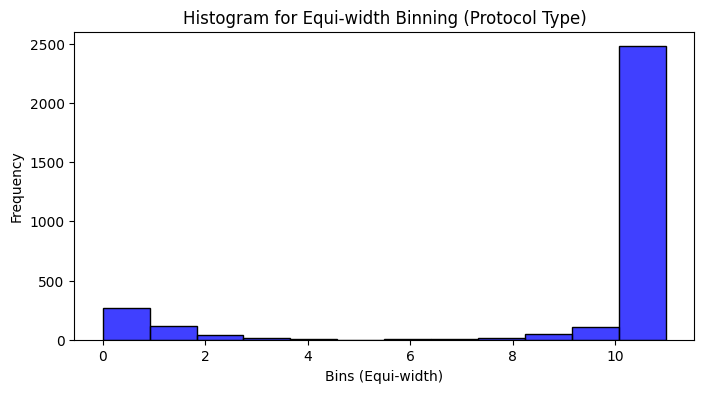

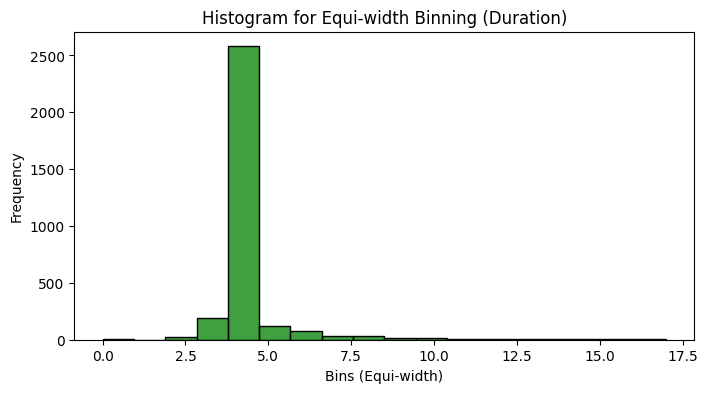

In [43]:
# Equi-width binning for Protocol Type
iotData['Protocol_Type_EquiWidth'] = pd.cut(iotData['Protocol Type'], bins=12, labels=False)

# Plot histogram for Equi-width binning of Protocol Type
plt.figure(figsize=(8, 4))
sns.histplot(iotData['Protocol_Type_EquiWidth'], bins=12, kde=False, color='blue')
plt.title('Histogram for Equi-width Binning (Protocol Type)')
plt.xlabel('Bins (Equi-width)')
plt.ylabel('Frequency')
plt.show()

# Equi-width binning for Duration
iotData['Duration_EquiWidth'] = pd.cut(iotData['Duration'], bins=18, labels=False)

# Plot histogram for Equi-width binning of Duration
plt.figure(figsize=(8, 4))
sns.histplot(iotData['Duration_EquiWidth'], bins=18, kde=False, color='green')
plt.title('Histogram for Equi-width Binning (Duration)')
plt.xlabel('Bins (Equi-width)')
plt.ylabel('Frequency')
plt.show()

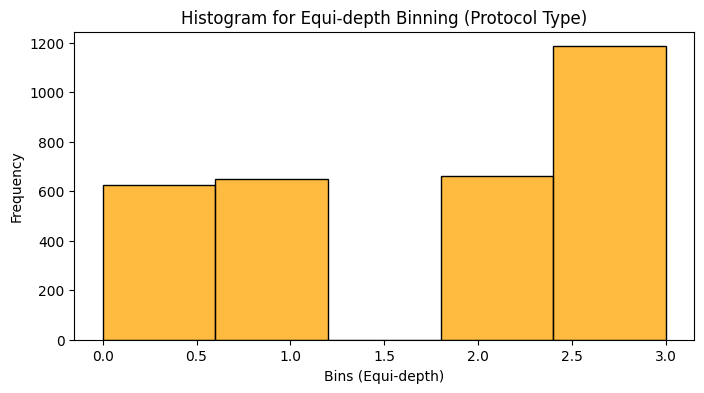

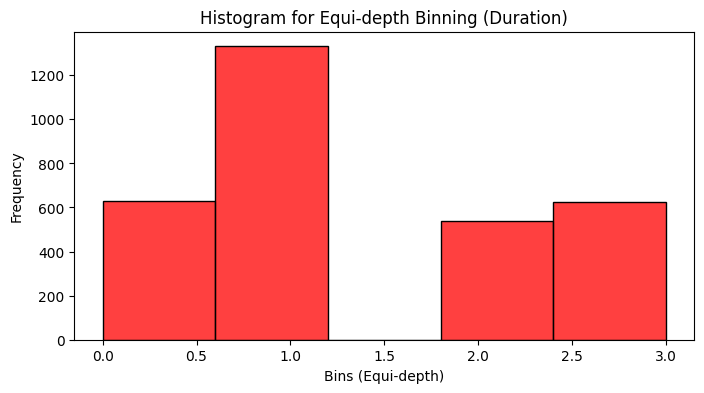

In [49]:
# Equi-depth binning for Protocol Type
iotData['Protocol_Type_EquiDepth'] = pd.qcut(protocol_type, q=5, labels=False, duplicates='drop')

# Plot histogram for Equi-depth binning of Protocol Type
plt.figure(figsize=(8, 4))
sns.histplot(iotData['Protocol_Type_EquiDepth'], bins=5, kde=False, color='orange')
plt.title('Histogram for Equi-depth Binning (Protocol Type)')
plt.xlabel('Bins (Equi-depth)')
plt.ylabel('Frequency')
plt.show()

# Equi-depth binning for Duration
iotData['Duration_EquiDepth'] = pd.qcut(duration, q=5, labels=False, duplicates='drop')

# Plot histogram for Equi-depth binning of Duration
plt.figure(figsize=(8, 4))
sns.histplot(iotData['Duration_EquiDepth'], bins=5, kde=False, color='red')
plt.title('Histogram for Equi-depth Binning (Duration)')
plt.xlabel('Bins (Equi-depth)')
plt.ylabel('Frequency')
plt.show()

In [51]:
# Export the DataFrame to an Excel file
iotData.to_excel('fda_a2_equi-depth_binned_data.xlsx', index=False)

## **1B Normalization**

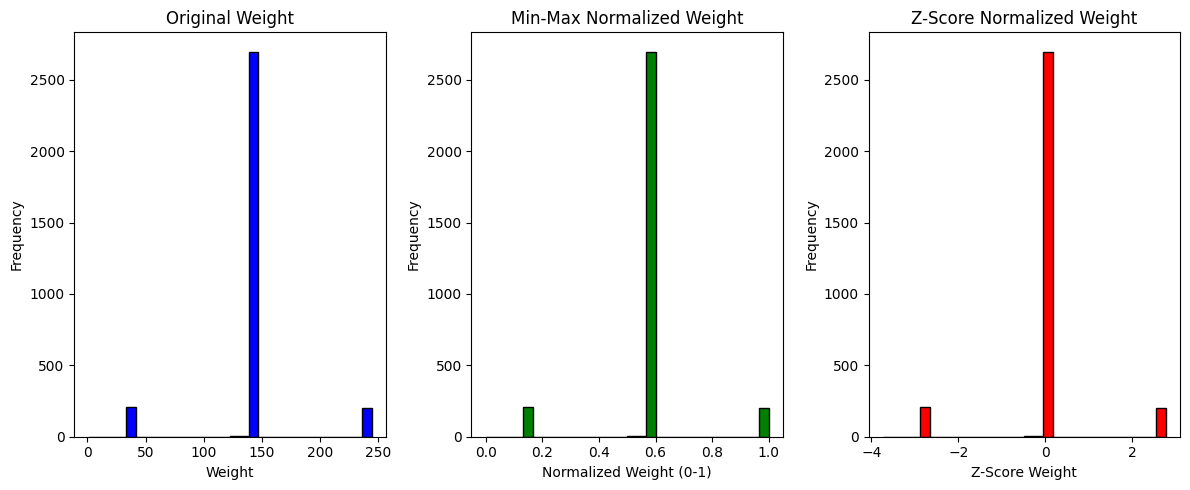

In [82]:
# Ensure 'Weight' column exists and contains valid numeric data
if 'Weight' in iotData.columns:
    # Handle any missing or invalid data in 'Weight' column if necessary
    iotData['Weight'] = pd.to_numeric(iotData['Weight'], errors='coerce')

    # Drop any rows with missing 'Weight' values
    iotData.dropna(subset=['Weight'], inplace=True)

    # Reshape the data for sklearn (it expects 2D arrays)
    weight_values = iotData[['Weight']].values

    # Min-Max Normalization using sklearn's MinMaxScaler
    min_max_scaler = MinMaxScaler(feature_range=(0, 1))
    iotData['Weight_minmax'] = min_max_scaler.fit_transform(weight_values)

    # Z-Score Normalization using sklearn's StandardScaler
    z_score_scaler = StandardScaler()
    iotData['Weight_zscore'] = z_score_scaler.fit_transform(weight_values)

    # Save the normalized results to a new CSV file
    iotData.to_csv('normalized_weights.csv', index=False)

    # Plot the original and normalized 'Weight' data for insights
    plt.figure(figsize=(12, 5))

    # Subplot 1: Original Weight
    plt.subplot(1, 3, 1)
    plt.hist(iotData['Weight'], bins=30, color='blue', edgecolor='black')
    plt.title('Original Weight')
    plt.xlabel('Weight')
    plt.ylabel('Frequency')

    # Subplot 2: Min-Max Normalized Weight
    plt.subplot(1, 3, 2)
    plt.hist(iotData['Weight_minmax'], bins=30, color='green', edgecolor='black')
    plt.title('Min-Max Normalized Weight')
    plt.xlabel('Normalized Weight (0-1)')
    plt.ylabel('Frequency')

    # Subplot 3: Z-Score Normalized Weight
    plt.subplot(1, 3, 3)
    plt.hist(iotData['Weight_zscore'], bins=30, color='red', edgecolor='black')
    plt.title('Z-Score Normalized Weight')
    plt.xlabel('Z-Score Weight')
    plt.ylabel('Frequency')

    plt.tight_layout()
    plt.show()

else:
    print("Error: 'Weight' column not found in the dataset.")


## **1B Discretisation**

In [87]:
# Define the bins for discretization
bins = [0, 1, 10000, float('inf')]  # [0-1] for Small, (1-10,000) for Medium, and [10,000-inf) for Large
labels = ['Small', 'Medium', 'Large']  # Labels for the categories

# Discretize the 'flow_duration' attribute into the three categories
iotData['flow_duration_category'] = pd.cut(iotData['flow_duration'], bins=bins, labels=labels, right=False)

# Get the frequency of each category
frequency = iotData['flow_duration_category'].value_counts()

# Display the frequency of each category
print(frequency)

# Save the updated dataframe to a new Excel file
iotData.to_excel('updated_dataset.xlsx', index=False)


flow_duration_category
Small     2742
Medium     372
Large        6
Name: count, dtype: int64


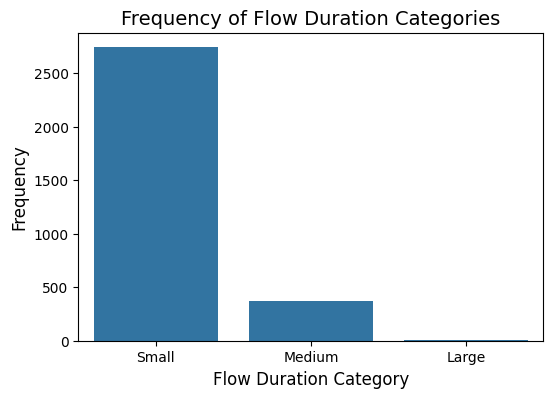

In [89]:
# Create a bar plot for the discretized flow_duration categories
plt.figure(figsize=(6, 4))
sns.countplot(x=iotData['flow_duration_category'], order=['Small', 'Medium', 'Large'])

# Set plot labels and title
plt.title('Frequency of Flow Duration Categories', fontsize=14)
plt.xlabel('Flow Duration Category', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Display the plot
plt.show()

## **1B Binarisation**

In [15]:
# View sample data of Header_Length
print(iotData['Header_Length'].head())

# Apply binarization technique: convert non-zero values to 1 and keep zero values as 0
iotData['Header_Length_Binarized'] = iotData['Header_Length'].apply(lambda x: 1 if x > 0 else 0)

# View sample of the binarized column
print(iotData[['Header_Length', 'Header_Length_Binarized']].head())

# Save the binarized results to the corresponding spreadsheet
iotData.to_csv('Binarised_Header_Length.csv', index=False)


0     15554.4
1    153256.0
2     68149.6
3      6140.9
4     23891.6
Name: Header_Length, dtype: float64
   Header_Length  Header_Length_Binarized
0        15554.4                        1
1       153256.0                        1
2        68149.6                        1
3         6140.9                        1
4        23891.6                        1


## **Verifying Mode**

In [ ]:
iotData['fin_flag_number'].value_counts()
iotData['syn_flag_number'].value_counts()
iotData['rst_flag_number'].value_counts()
iotData['psh_flag_number'].value_counts()
iotData['ack_flag_number'].value_counts()
iotData['ece_flag_number'].value_counts()
iotData['cwr_flag_number'].value_counts()
iotData['HTTP'].value_counts()
iotData['HTTPS'].value_counts()
iotData['DNS'].value_counts()
iotData['Telnet'].value_counts()
iotData['Duration'].value_counts()
# iotData['SSH'].value_counts()
# iotData['IRC'].value_counts()
# iotData['TCP'].value_counts()
# iotData['UDP'].value_counts()
# iotData['DHCP'].value_counts()
# iotData['ARP'].value_counts()
# iotData['ICMP'].value_counts()
# iotData['IPv'].value_counts()
# iotData['LLC'].value_counts()


,count
Duration,
64.00,1291
63.36,241
65.91,136
62.72,70
64.64,42
...,...
67.99,1
65.92,1
63.02,1
